In [1]:
import numpy as np

In [2]:
x = np.random.rand(10,1,28,28)
x.shape

(10, 1, 28, 28)

In [4]:
x[0,0]

array([[4.13415213e-01, 1.83677414e-02, 7.56234098e-01, 8.83455801e-01,
        6.82966403e-01, 9.29216776e-01, 9.42005327e-01, 9.80021386e-01,
        8.87848722e-01, 9.44730469e-02, 5.69155191e-01, 4.96452675e-01,
        5.45733185e-02, 5.23494204e-01, 6.00921787e-01, 2.44683684e-01,
        8.39251506e-02, 2.82606392e-01, 8.34195719e-01, 3.74780170e-01,
        6.14593828e-02, 5.86769471e-01, 9.91544749e-02, 5.23903632e-01,
        1.60717626e-01, 1.33936881e-01, 6.43932668e-01, 4.48175150e-01],
       [6.38212102e-01, 5.96482714e-01, 7.50213594e-01, 6.25371008e-01,
        1.52808789e-01, 2.56638404e-01, 7.12607989e-01, 8.29745977e-01,
        2.89699776e-01, 5.79046313e-01, 7.38534445e-01, 1.06814269e-01,
        5.63846609e-01, 4.36657125e-01, 6.35963106e-01, 7.12198476e-01,
        7.68258725e-01, 4.49632856e-02, 1.23923518e-02, 7.23670021e-01,
        8.50996851e-01, 5.48164560e-02, 7.30409308e-01, 4.03839019e-01,
        5.31486276e-01, 1.21285533e-01, 5.74499398e-01, 7.08949

In [5]:
x[0][0]

array([[4.13415213e-01, 1.83677414e-02, 7.56234098e-01, 8.83455801e-01,
        6.82966403e-01, 9.29216776e-01, 9.42005327e-01, 9.80021386e-01,
        8.87848722e-01, 9.44730469e-02, 5.69155191e-01, 4.96452675e-01,
        5.45733185e-02, 5.23494204e-01, 6.00921787e-01, 2.44683684e-01,
        8.39251506e-02, 2.82606392e-01, 8.34195719e-01, 3.74780170e-01,
        6.14593828e-02, 5.86769471e-01, 9.91544749e-02, 5.23903632e-01,
        1.60717626e-01, 1.33936881e-01, 6.43932668e-01, 4.48175150e-01],
       [6.38212102e-01, 5.96482714e-01, 7.50213594e-01, 6.25371008e-01,
        1.52808789e-01, 2.56638404e-01, 7.12607989e-01, 8.29745977e-01,
        2.89699776e-01, 5.79046313e-01, 7.38534445e-01, 1.06814269e-01,
        5.63846609e-01, 4.36657125e-01, 6.35963106e-01, 7.12198476e-01,
        7.68258725e-01, 4.49632856e-02, 1.23923518e-02, 7.23670021e-01,
        8.50996851e-01, 5.48164560e-02, 7.30409308e-01, 4.03839019e-01,
        5.31486276e-01, 1.21285533e-01, 5.74499398e-01, 7.08949

In [7]:
from common.functions import *
from common.util import im2col, col2im

In [9]:
import sys, os
sys.path.append(os.pardir)
from common.util import im2col

In [14]:
x1 = np.random.rand(1,3,7,7) # 데이터 수, 채널수, 7높이*7너비
col1 = im2col(x1, 5,5, stride =1 , pad = 0)
print(col1.shape) # (9,75)

(9, 75)


In [ ]:
x2 = np.random.rand(10,3,7,7)
col2 = im2col(x2, 5,5,stride = 1, pad=0)
print(col2.shape) # 필터의 원소수(25개) 3개의 채널(3행)을 더하면
                  # 3(채널)행 * 10번의 배치

(90, 75)


In [20]:
class Convlution : 
  def __inint__(self, W,b,strdie = 1, pad=0):
    self.W = W
    self.b = b
    self.stride = strdie
    self.pad = pad
    # 필터(가중치), 편향, 스트라이드 패딩으로 초기화
    # 필터의 4차원 현상(FN, C, FH,FW)

  def forward(self, x):
    Fn, C, FH, FW =self.w.shape
    N,C,H,W = x.shape
    out_h = int(1+(H + 2*self.pad -FH)/self.stride)
    out_w = int(1+(W + 2*self.pad -FW)/self.stride)

    col = im2col(x, FH, FW, self.stride, self.pad)
    col_W = self.W.reshape(FN, -1).T 
    # reshape에서, 두번째 인수 -1로 지정하면, 다차원 배열의
    #원소수가 변환후에도 똑같이 유지되도록 적절히 묶어준다.
    # ex (10,3,5,5)의 형상을 한 다차원 배열 W의 원소수 750개, reshape(10,-1)
    # => (10, 75)인 배열로 만들어 준다.
    out = np.dot(col, colw_W) +self.b

    out = out.reshape(N, out_h, out_w, -1).transpose(0,3,1,2)
                                    # np.transpose 함수
                                    # 다차원 배열의 축순서를 바꿔주는 함수 
                                    #  N, H, W, C -> N, C, H, W                          

    return out


In [21]:
#7.4.4
# 합성곱 계층과 마찬가지로 im2col을 사용해 입력데이터를 전개한다.
# 단, 풀링의 경우, 채널 쪽이 독립적이라는 점이 합성곱 계층 때와 다르다.

In [ ]:
class Pooling:
  def __init__(self, pool_h, pool_w, stride =1, pad=0):
    self.pool_h= pool_h
    self.pool_w= pool_w
    self.pool_stride= stride
    self.pad = pad

  def forward(self, x):
    N, C, H, W =x.shape
    out_h = int(1+(H -self.pool_h) / self.stride)
    out_w = int(1+(w -self.pool_w) / self.stride)

    # 전개 (1)
    col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
    col = col.reshape(-1,self.pool_h*self.pool_w)

    # 최댓값(2) : 최대 풀링, 풀링계층
    out = np.max(col, axis=1) # np.max의 변수 axis=는 0이면 열방향, 1이면 행방향
    
    # 성형(3)

    out = out.reshape(N, out_h, out_w, C).transpose(0,3,1,2)

    return out

    # 이상 풀링 계층의 forward 처리.
    # backward처리는 5.5.1 ReLu 계층 역전파 참고

    

In [25]:
#  7.5 CNN 구현

In [44]:
class SimpleConvNet:
  def __init__(self, input_dim=(1,28,28),
               conv_parm={'filter_num' : 30, 'filter_size':5, 'pad':0, 'stirde':1},
               hidden_size=100, output_size=10, weight_init_std = 0.01):
    filter_num= conv_param['filter_num']
    filter_size= conv_param['filter_size']
    fiter_pad =cov_param['apd']
    fiter_stride =conv_param['stride']
    input_size=input_dim[1]
    conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
    pool_output_size = int(filter_num*(conv_output_size/2)*(conv_output_size/2))


    # 가중치 매개변수를 초기화하는 부분입니다.
    # 학습에 필요한 매개변수 1번째 층의 합성곱 계층과 나머지 두 완전연결 계층의 가중치와 편향
    # 이들 매개변수를 params 딕셔너리에 저장한다.

    self.params = {}
    # 'W1','b1' : 첫번째 합성곱계층의 가중치와 편향
    # 'W2','b2' : 두번째 완전연결계층의 가중치와 편향

    self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
    self.params['b1'] = np.zeros(filter_num)
    self.params['W2'] = weight_init_std*\
                        np.random.randn(pool_output_size, hidden_size)
    self.params['b2'] = np.seros(hidden_size)
    self.parmas['W3'] = weight_init_std*\
                      np.random.randn(hidden_size,output_size)
    self.params['b3'] = np.zeros(output_size)

    #CNN을 구성하는 계층을 생성

    self.layers =OrderreDict()
    self.layers['Conv1'] = Convolution(self.params['W1'],
                                       self.params['b1'],
                                       conv_param['stride'],
                                       conv_param['pad'])
    self.layers['Relu1'] = Relu()
    self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
    self.layers['Affine1'] = Affine(self.params['W2'],                                    
                                    self.params['b2'])

    self.layers['Relu2'] = Relu()
    self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

    self.last_layer =SoftmaxWithLoss()
    
    def predict(self,x):
      for layer in self.layers.values():
        x=layer.forward(x)

        return x
    
    def loss(self, x,t):
      """"손실 함수를 구한다.
      
      Parameters 

      ------------
      x = 입력 데이터
      t = 정답 레이블
      """
      y =self.predict(x)
      return self.last_layer.forward(y,t)
    
    def accuracy(self, x, t, batch_size =100):
      if t.ndim !=1 : t =np.argmax(t,axis=1)

      acc = 0.0
      
      for i in range(int(x.shape[0]/batch_size)):
        tx = x[i*batch_size:(i+1)*batch_size]
        tt = t[i*batch_size:(i+1)*batch_size]
        y = self.predict(tx)
        y=np.argmax(y,axis=1)
        acc +=np.sum(y==tt)

      # 오차역전파법으로 기울기를 구하는 구현

      def gradient(self, x , t):
        # 순전파
        self.loss(x,t)

        # 역전파
        dout = 1
        dout =self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
          dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Conv1'].dW
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dW
        grads['b2'] =self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dW
        grads['b3'] = self.layers['Affine2'].db

        return grads

        

In [45]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 1.1 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.0 MB 1.1 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/8.0 MB 1.2 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.0 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.0 MB 1.2 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.0 MB 1.2 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/8.0 MB 1.2 MB/s eta 0

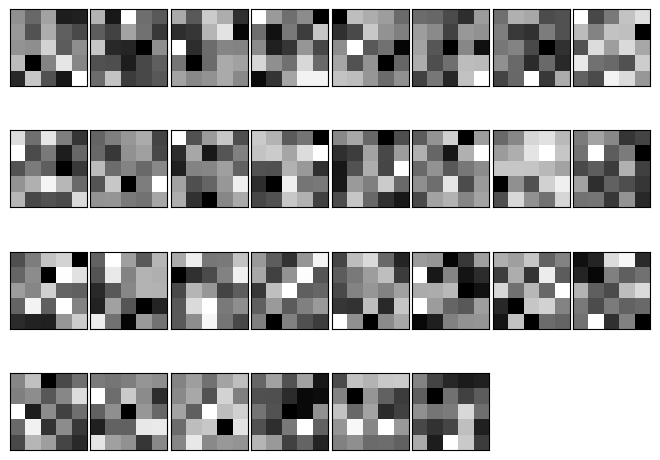

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\TFX5450H\\Desktop\\scratch/params.pkl'

: 

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. c:\Users\TFX5450H\Desktop\Downloads\07d530d5e08011832b12-2e87c780df94bb1d9172289aea93469ae076343d\07d530d5e08011832b12-2e87c780df94bb1d9172289aea93469ae076343d\train_mnist_cnn.py c:\Users\TFX5450H\Desktop\Downloads\07d530d5e08011832b12-2e87c780df94bb1d9172289aea93469ae076343d\07d530d5e08011832b12-2e87c780df94bb1d9172289aea93469ae076343d\draw_weight.py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])
